In [2]:
'''
Data Set Information:

The Washington State Department of Health presents this information as a service to the public. This includes information on the work status, practice characteristics, education, and demographics of healthcare providers, provided in response to the Washington Health Workforce Survey.

This is a complete set of data across all of the responding professions. The data dictionary identifies questions that are specific to an individual profession and aren't common to all surveys. The dataset is provided without identifying information for the responding providers.

More information on the Washington Health Workforce Survey can be found at www.doh.wa.gov/workforcesurvey'''

import pandas as pd 
df = pd.read_csv('https://data.wa.gov/api/views/cvrw-ujje/rows.csv?accessType=DOWNLOAD')



In [4]:
##importing packages

import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sea 
from scipy import stats
import math
import statsmodels.api


In [24]:
##Creating an age column out of healthcare worker birth years
df['Age'] = 2020 - df['BirthYear']
df['Age'] = np.floor(df['Age'])
for i in range(len(df)):
    if df['Age'][i] < 18:
        df['Age'][i] = None


In [6]:
##Identifying different racial and ethnic groups
print(df.Race.unique())
print(df.Ethnicity.unique())

[nan 'White' 'Asian'
 'Black African American,American Indian or Alaska Native'
 'Black African American' 'White,American Indian or Alaska Native'
 'White,Asian'
 'White,Black African American,American Indian or Alaska Native,Native Hawaiian Pacific Islander'
 'Native Hawaiian Pacific Islander' 'White,Black African American'
 'Asian,Native Hawaiian Pacific Islander'
 'American Indian or Alaska Native'
 'White,Black African American,American Indian or Alaska Native'
 'Black African American,Asian'
 'White,Black African American,Asian,Native Hawaiian Pacific Islander'
 'BlackAfricanAmerican' 'White,AmericanIndianOrAlaskaNative'
 'White,Asian,Native Hawaiian Pacific Islander'
 'White,Black African American,American Indian or Alaska Native,Asian,Native Hawaiian Pacific Islander'
 'AmericanIndianOrAlaskaNative' 'White,Native Hawaiian Pacific Islander'
 'White,Black African American,Asian'
 'White,Black African American,Native Hawaiian Pacific Islander'
 'American Indian or Alaska Native,Nat

In [7]:
##Identifying unique credentials
print(df.CredentialType.unique())

['Orthotist License' 'Midwife License' 'Optician Dispensing License'
 'Dental Hygiene License' 'Nursing Assistant Certification'
 'Prosthetist License' 'Respiratory Care Practitioner License'
 'Naturopathic Physician License'
 'Marriage and Family Therapist Associate License'
 'Social Worker Advanced License' 'X-Ray Technician Registration'
 'Psychologist License' 'Osteopathic Physician & Surgeon License'
 'Massage Therapist License' 'Speech Language Pathologist License'
 'Hearing Aid Specialist License' 'Pharmacist License'
 'Medical Assistant Certification' 'Dental Assistant Registration'
 'Pharmacy Technician Certification' 'Athletic Trainer License'
 'Mental Health Counselor License' 'Marriage and Family Therapist License'
 'Social Worker Independent Clinical License' 'Denturist License'
 'Radiologic Technologist Certification'
 'Medical Assistant Phlebotomist Certification'
 'Mental Health Counselor Associate License'
 'Social Worker Associate Independent Clinical License'
 'Physi

In [25]:
print(df.Age.min())

18.0


In [26]:
##Creating columns for racial categories. 
def race_finder (race, data):
    colName = 'Is' + race
    data[colName] = 0
    for i in range(len(df)):
        if race == 'NA' and type(data['Race'][i]) is float:
            df[colName][i] = 1
        elif str(data['Race'][i]).find(race) != -1:
            data[colName][i] = 1
        else:
            data[colName][i] = 0 
    return data  

df = race_finder('White', df)
df = race_finder('Black', df)
df = race_finder('Asian', df)
df = race_finder('Indian', df)
df = race_finder('Pacific', df)
df = race_finder('NA', df)


In [27]:
##Creating a column for hispanic identiification
df['IsHispanic'] = 0
count = 0
for i in range(len(df)):
    entry = df['Ethnicity'][i]
    if type(entry) is float:
        df['IsHispanic'][i] = 0
    elif entry != 'No':
        df['IsHispanic'][i] = 1
        count = count + 1
    else:
        df['IsHispanic'][i] = 0


In [28]:
#creating sub tables for further analysis by racial/ethnic category
white = df[df['IsWhite'] == 1]
nonWhite = df[df['IsWhite'] == 0]
black = df[df['IsBlack'] == 1]
nonBlack = df[df['IsBlack'] == 0]
asian = df[df['IsAsian'] == 1]
nonAsian = df[df['IsAsian'] == 1]
americanIndian = df[df['IsIndian'] == 1]
notIndian = df[df['IsIndian'] == 0]
pacificIslander = df[df['IsPacific'] == 1]
notPacificIslander = df[df['IsPacific'] == 0]
hispanic = df[df['IsHispanic'] == 1]
notHispanic = df[df['IsHispanic'] == 0]
noRace = df[df['IsNA'] == 1]
hasRace = df[df['IsNA'] == 0]

In [29]:
##Function defining an A/B test analysis for two data sets
def A_B_test (a_set, b_set):
    a_skew = a_set.skew()
    a_kurtosis = a_set.kurtosis()
    a_size = len(a_set)
    a_var = a_set.var()
    a_mean = a_set.mean()
    b_skew = b_set.skew()
    b_kurtosis = b_set.kurtosis()
    b_size = len(b_set)
    b_var = b_set.var()
    b_mean = b_set.mean()
    print('The Sample Size of the A group is:', a_size)
    print('The Mean of the A group is:', a_mean)
    print('The Variance of the A group is:', a_var)
    print('The Skew of the A group is:', a_skew)
    print('The Kurtosis of the A group is:', a_kurtosis)
    print('\n')
    print('The Sample Size of the B group is:', b_size)
    print('The Mean of the B group is:', b_mean)
    print('The Variance of the B group is:', b_var)
    print('The Skew of the B group is:', b_skew)
    print('The Kurtosis of the B group is:', b_kurtosis)
    print('\n')
    print('The Difference in Means between A and B is:', a_mean - b_mean)


In [30]:
##Function defining a 95% CI for the difference in two data sets
def get_95_ci(data1, data2):
    n1 = len(data1)
    n2 = len(data2)
    sd1 = np.std(data1)
    sd2 = np.std(data2)
    m1 = data1.mean()
    m2 = data2.mean()
    uci = m1 - m2 + 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    lci = m1 - m2 - 1.96 * np.sqrt((sd1**2/n1)+(sd2**2/n2))
    print('Upper Confidence Interval: ' + str(uci))
    print('Lower Confidence Interval: ' + str(lci))

In [31]:
##Function defining a full t-test analysis for two data sets and a given variable
def t_test_analysis(a, b, var):
    A_B_test(a[var], b[var])
    print('\n')
    print('t-test results:', stats.ttest_ind(a[var], b[var], nan_policy='omit'))
    print('\n')
    get_95_ci(a[var], b[var])



In [32]:
#Function defining a non-parametric analysis for non-normally distributed data
def non_parametric_analysis(a, b, var):
    a_median = a[var].median()
    b_median = b[var].median()

    a_mean = a[var].mean()
    b_mean = b[var].mean()

    print('\n' + 'A median:', a_median)
    print('\n' + 'A mean:', a_mean)

    print('\n' + 'B median:', b_median)
    print('\n' + 'B mean:', b_mean)

    print('\n' + 'Difference in Medians:', a_median - b_median)
    print('\n' + 'Difference in Means:', a_mean - b_mean)

    print('\n' + str(stats.mannwhitneyu(a[var], b[var])))

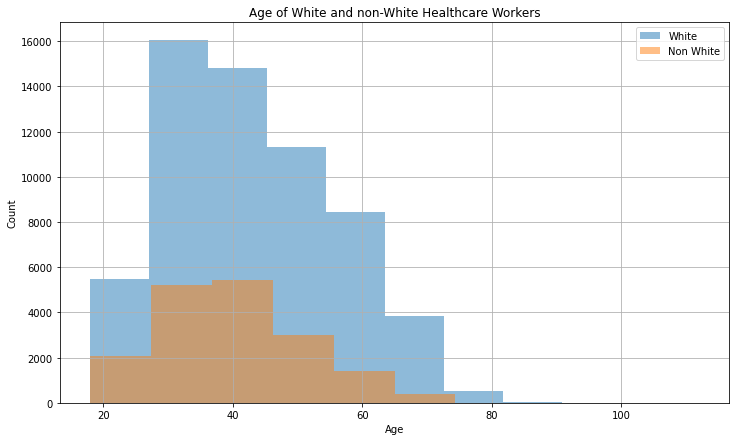

The Sample Size of the A group is: 61206
The Mean of the A group is: 43.177400419980486
The Variance of the A group is: 159.50682348778113
The Skew of the A group is: 0.39212256080464064
The Kurtosis of the A group is: -0.6000791718206169


The Sample Size of the B group is: 19420
The Mean of the B group is: 40.27172240897954
The Variance of the B group is: 123.26308580236905
The Skew of the B group is: 0.5133907952675613
The Kurtosis of the B group is: -0.03310317182627465


The Difference in Means between A and B is: 2.905678011000944


t-test results: Ttest_indResult(statistic=27.54683209544578, pvalue=3.0344469361001006e-166)


Upper Confidence Interval: 3.091132587426916
Lower Confidence Interval: 2.7202234345749723


In [65]:
##H1: There is a significant difference between the age of White and Non-White identifying healthcare providers
plt.figure(figsize=(12, 7))
white['Age'].hist(alpha=0.5)
nonWhite['Age'].hist(alpha=0.5)
plt.legend(['White', 'Non White'])
plt.xlabel('Age')
plt.ylabel("Count")
plt.title('Age of White and non-White Healthcare Workers')
plt.show()
#Looks Normally Distributed 

t_test_analysis(white, nonWhite, 'Age')

H1 is supported, as there is a significant difference between the age of White and Non-White identifying healthcare providers, and the confidence interval does not include zero

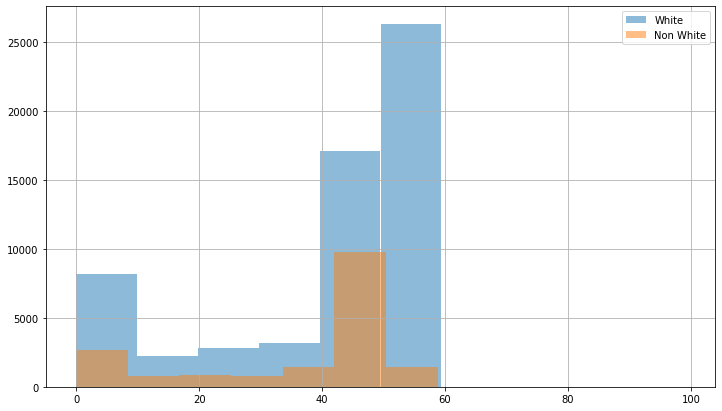


A median: 49.0

A mean: 38.922417850169396

B median: 48.0

B mean: 37.445711307679304

Difference in Medians: 1.0

Difference in Means: 1.476706542490092

MannwhitneyuResult(statistic=574088571.5, pvalue=1.4558953098476721e-13)


In [61]:
#H2: There is a significant difference between the number of weeks worked by White and Non-White identifying healthcare providers
plt.figure(figsize=(12, 7))
white['AnnualWeeksWorked'].hist(alpha=0.5)
nonWhite['AnnualWeeksWorked'].hist(alpha=0.5)
plt.legend(['White', 'Non White'])
plt.show()
##Non-Normally Distributed

non_parametric_analysis(white, nonWhite, 'AnnualWeeksWorked')


H2 is supported as there is a significant difference between the number of weeks worked by White and Non-White identifying healthcare providers

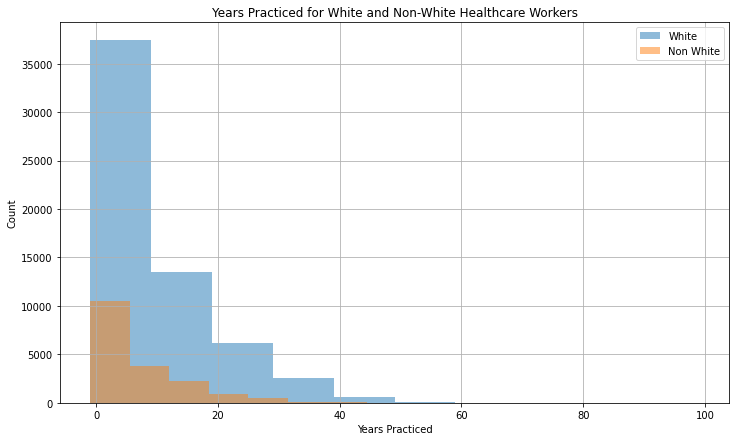


A median: 5.0

A mean: 8.985325063005703

B median: 4.0

B mean: 6.978901870440458

Difference in Medians: 1.0

Difference in Means: 2.0064231925652454

MannwhitneyuResult(statistic=560256853.0, pvalue=6.7363606477241204e-34)


In [66]:
#H3: There is a significant difference between the number of years practiced between White and Non-White identifying healthcare professionals
plt.figure(figsize=(12, 7))
white['NumberYearsPracticeWashington'].hist(alpha=0.5)
nonWhite['NumberYearsPracticeWashington'].hist(alpha=0.5)
plt.legend(['White', 'Non White'])
plt.xlabel('Years Practiced')
plt.ylabel("Count")
plt.title('Years Practiced for White and Non-White Healthcare Workers')
plt.show()
#Non-Normally Distributed

non_parametric_analysis(white, nonWhite, 'NumberYearsPracticeWashington')

H3 is supported, as there is a significant difference between the number of years practiced between White and Non-White identifying healthcare professionals

Proportion of providers that can speak another language: 0.2611440478257634
Proportion of White providers that can speak another language: 0.17356141554749535
Proportion of Non-White providers that can speak another language: 0.537178166838311


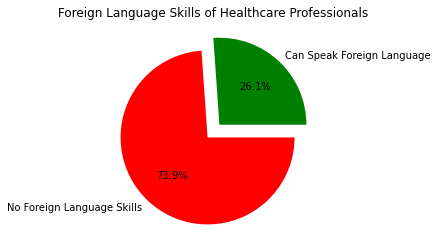

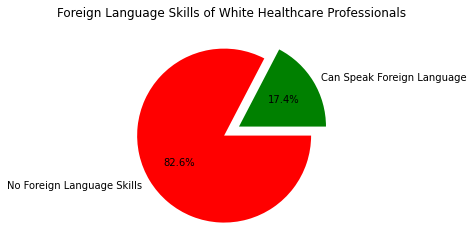

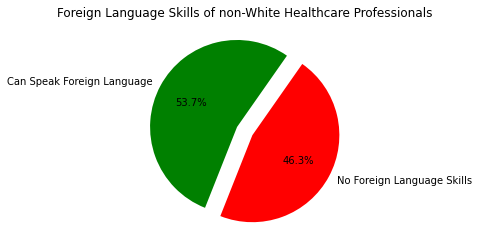

In [94]:
##H4: There is a significant difference in the proportion of healthcare providers who can communicate in another language betwen white and non-white identifying healthcare providers
otherLanguage = len(df[df['CommunicateOtherLanguage'] == True]) / len(df)
whiteOtherLanguage = len(white[white['CommunicateOtherLanguage'] == True]) / len(white)
nonWhiteOtherLanguage = len(nonWhite[nonWhite['CommunicateOtherLanguage'] == True]) / len(nonWhite)
print('Proportion of providers that can speak another language:', otherLanguage)
print('Proportion of White providers that can speak another language:', whiteOtherLanguage)
print('Proportion of Non-White providers that can speak another language:', nonWhiteOtherLanguage)

n_speakers = len(df[df['CommunicateOtherLanguage'] == True])
n_non_speakers = len(df) - n_speakers
plt.pie([n_speakers, n_non_speakers], labels=['Can Speak Foreign Language', 'No Foreign Language Skills'], explode=[.1, .1], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Foreign Language Skills of Healthcare Professionals')
plt.show()

n_white_speakers = len(white[white['CommunicateOtherLanguage'] == True])
n_white_non_speakers = len(white) - n_white_speakers
plt.pie([n_white_speakers, n_white_non_speakers], labels=['Can Speak Foreign Language', 'No Foreign Language Skills'], explode=[.1, .1], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Foreign Language Skills of White Healthcare Professionals')
plt.show()

n_non_white_speakers = len(nonWhite[nonWhite['CommunicateOtherLanguage'] == True])
n_non_white_non_speakers = len(nonWhite) - n_non_white_speakers
plt.pie([n_non_white_speakers, n_non_white_non_speakers], labels=['Can Speak Foreign Language', 'No Foreign Language Skills'], explode=[.1, .1], autopct='%1.1f%%', colors=['green', 'red'], startangle=55)
plt.title('Foreign Language Skills of non-White Healthcare Professionals')
plt.show()

In [37]:
#z-test for proportions
statsmodels.stats.proportion.proportions_ztest([len(white[white['CommunicateOtherLanguage'] == True]), len(nonWhite[nonWhite['CommunicateOtherLanguage'] == True])], [len(white), len(nonWhite)])

(-100.50970146498321, 0.0)

H4 is supported, as there is a significant difference in the proportion of healthcare providers who can communicate in another language betwen white and non-white identifying healthcare providers

In [38]:
##H5: There is a significant difference in the proportion of healthcare providers with a physicians license between white and non-white identifying providers.
isPhysician = len(df[df['CredentialType'] == "Osteopathic Physician & Surgeon License"]) / len(df)
whitePhysicians = len(white[white['CredentialType'] == "Osteopathic Physician & Surgeon License"]) / len(white)
nonWhitePhysicians = len(nonWhite[nonWhite['CredentialType'] == "Osteopathic Physician & Surgeon License"]) / len(nonWhite)
print('Proportion of providers who are physicians:', isPhysician)
print('Proportion of White providers that are physicians:', whitePhysicians)
print('Proportion of Non-White providers that are physicians:', nonWhitePhysicians)


Proportion of providers who are physicians: 0.041177783841440725
Proportion of White providers that are physicians: 0.04411332222331144
Proportion of Non-White providers that are physicians: 0.03192584963954686


In [39]:
#z-test for proportions
statsmodels.stats.proportion.proportions_ztest([len(white[white['CredentialType'] == "Osteopathic Physician & Surgeon License"]), len(nonWhite[nonWhite['CredentialType'] == "Osteopathic Physician & Surgeon License"])], [len(white), len(nonWhite)])

(7.447271339692489, 9.5290507486135e-14)

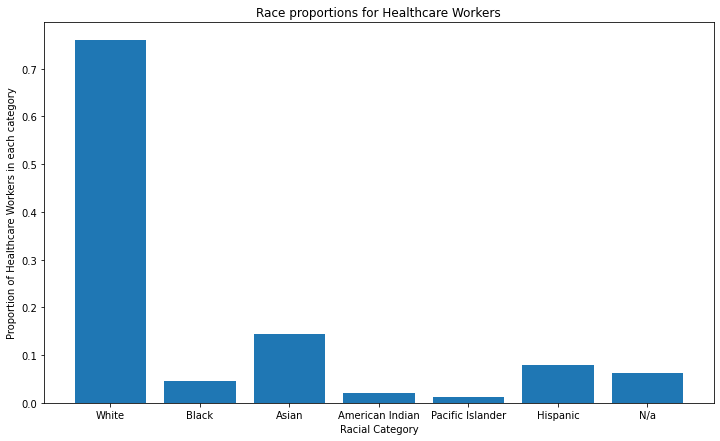

In [56]:
raceNames = ['White', 'Black', 'Asian', 'American Indian', 'Pacific Islander', 'Hispanic', 'N/a']
proportions = [len(white)/len(df), len(black)/len(df), len(asian)/len(df), len(americanIndian)/len(df), len(pacificIslander)/len(df), len(hispanic)/len(df), len(noRace)/len(df)]

plt.figure(figsize=(12, 7))

x_pos = [i for i, _ in enumerate(raceNames)]

plt.bar(x_pos, proportions)
plt.xlabel("Racial Category")
plt.ylabel("Proportion of Healthcare Workers in each category")
plt.title("Race proportions for Healthcare Workers")


plt.xticks(x_pos, raceNames)
plt.show()


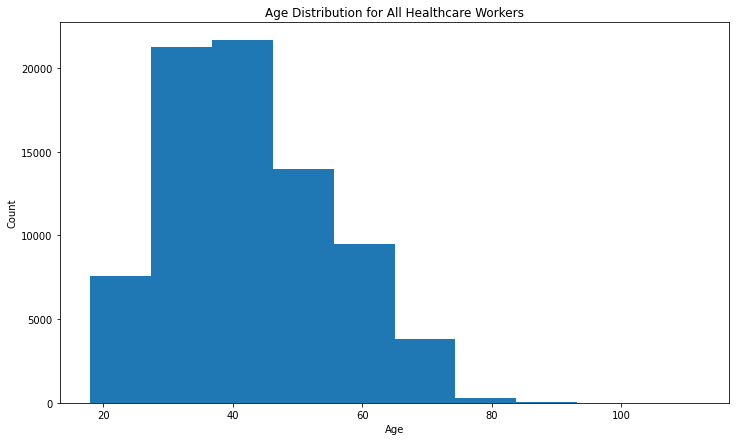

In [58]:
plt.figure(figsize=(12, 7))

plt.hist(df['Age'])

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution for All Healthcare Workers")
plt.show()